In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

# [1] House Prices - Advanced Regerssion Techniques
- [Kaggle Link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation)
- 집 값 예측 (회귀) -> RMSE 평가지표

In [49]:
train = pd.read_csv('/Users/paul/Downloads/house-prices-advanced-regression-techniques/train.csv', index_col=0)
test = pd.read_csv('/Users/paul/Downloads/house-prices-advanced-regression-techniques/test.csv', index_col=0)
target_column = list(set(train.columns) - set(test.columns))

y_train = train[target_column]

print('train:', train.shape)
print('test: ', test.shape)
print('target column:', target_column, '\n')
train.head()

train: (1460, 80)
test:  (1459, 79)
target column: ['SalePrice'] 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1. NA 값 확인

- NA의 개수가 약 90% 이상인 항목들은 제거

In [52]:
train.isnull().sum().sort_values().tail(20)

RoofMatl           0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageYrBlt       81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageType        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [53]:
train.drop(columns=['Fence', 'Alley', 'MiscFeature', 'PoolQC'], inplace=True)
print(train.shape)
train.head()

(1460, 76)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 2. Taget 변수와 상관관계가 절댓값 0.3보다 큰 변수들 시각화
- 그 중에서도 상관관계가 높은 항목들
    - 0.79 -> OverallQual: Rates the overall material and finish of the house
    - 0.71 -> GrLivArea: Above grade (ground) living area square feet
    - 0.64 -> GarageCars: Size of garage in car capacity
    - 0.62 -> GarageArea: Size of garage in square feet
    - 0.61 -> TotalBsmtSF: Total square feet of basement area
    - 0.61 -> 1stFlrSF: First Floor square feet

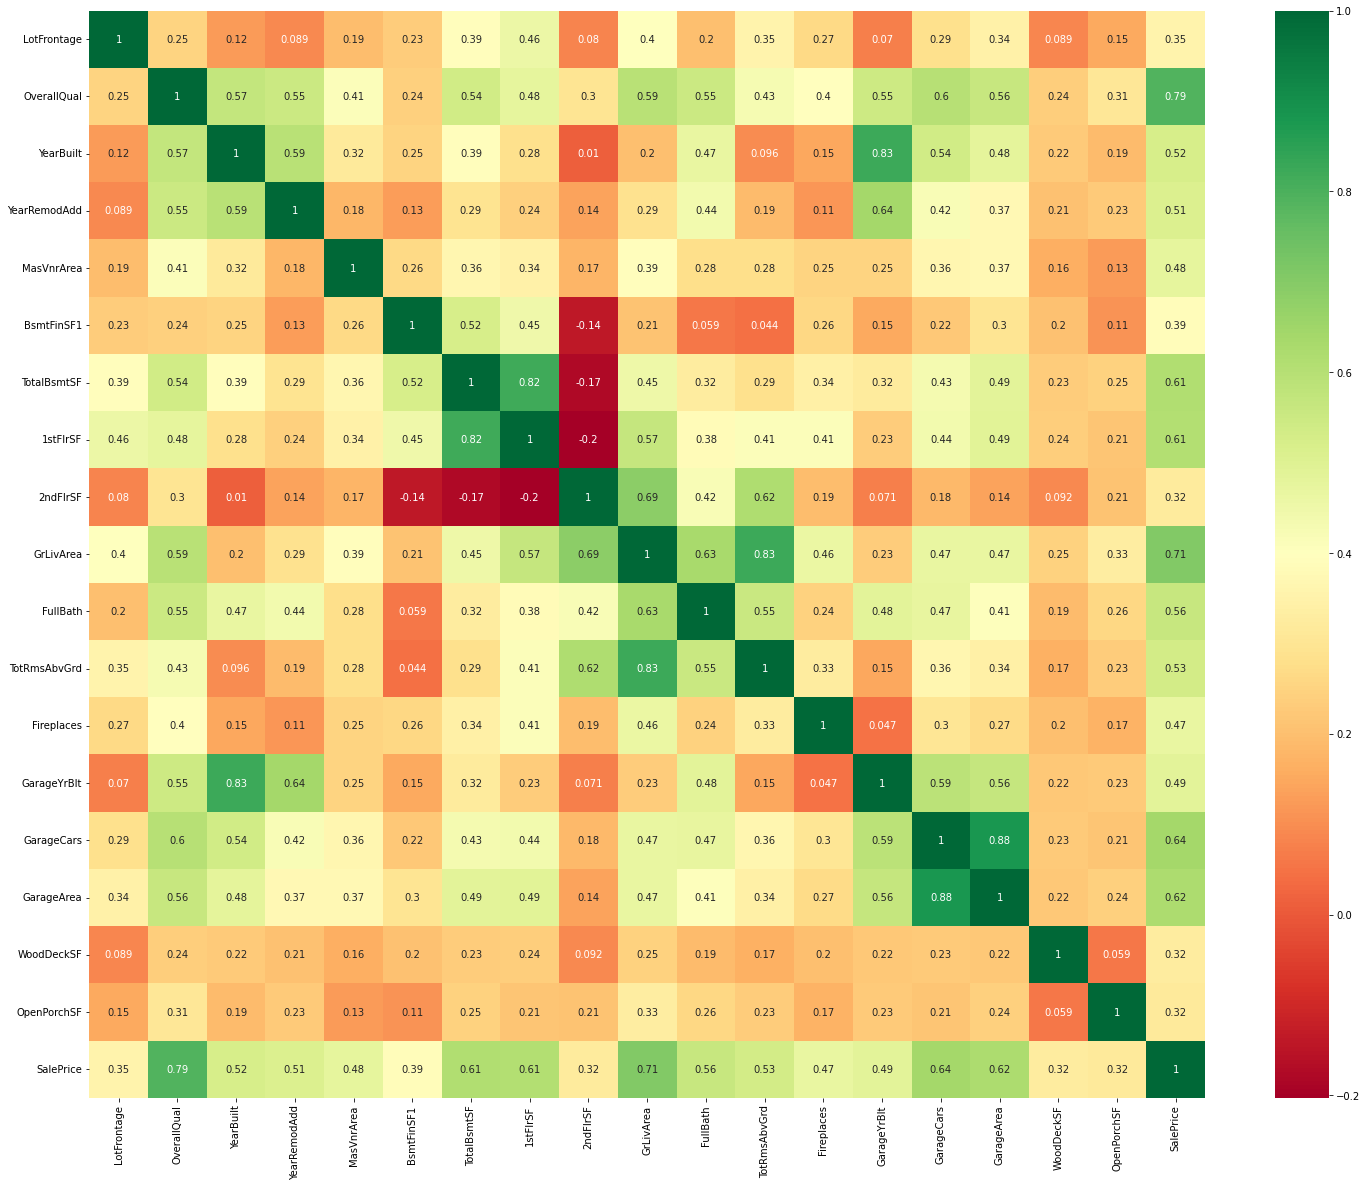

In [60]:
corr = train.corr()
top_corr = corr.index[abs(corr["SalePrice"]) >= 0.3]

plt.figure(figsize=(25, 20))
sns.heatmap(train[top_corr].corr(), annot=True, cmap="RdYlGn")
plt.show()

### 3. 수치형, 카테고리형 변수 나눠주기

In [64]:
categorical_df = train.select_dtypes(include='object')  # 카테고리형
numerical_df = train.select_dtypes(exclude='object')    # 수치형

print(categorical_df.shape)
print(numerical_df.shape)

(1460, 39)
(1460, 37)


In [71]:
categorical_dummies_df = pd.get_dummies(categorical_df, drop_first=True)
print(categorical_dummies_df.shape)
categorical_dummies_df.head()

(1460, 200)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [81]:
train_df = pd.concat([categorical_dummies_df, numerical_df], axis=1)

imputer = SimpleImputer(strategy="median")
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
print(train_df.shape)
train_df.head(5)

(1460, 237)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


### 4. Test 데이터셋도 동일하게 전처리해주기

In [98]:
test.drop(columns=['Fence', 'Alley', 'MiscFeature', 'PoolQC'], inplace=True)

categorical_test_df = test.select_dtypes(include='object')  # 카테고리형
numerical_test_df = test.select_dtypes(exclude='object')    # 수치형
categorical_dummies_test_df = pd.get_dummies(categorical_test_df, drop_first=True)

test_df = pd.concat([categorical_dummies_test_df, numerical_test_df], axis=1)

imputer = SimpleImputer(strategy="median")
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)
print(test_df.shape)
test_df.head(5)

(1459, 220)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


In [106]:
except_col = list(set(train_df.columns) - set(test_df.columns))
except_col.remove('SalePrice')

train_df.drop(columns=except_col, inplace=True)

### 5. 모델링

In [107]:
### Target Column과 그 외에 것들을 나눠주기
y = train_df['SalePrice']
X = train_df.drop(columns=['SalePrice'])
print(X.shape, y.shape, '\n')

### train, test 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1460, 220) (1460,) 

(1022, 220) (1022,)
(438, 220) (438,)


In [135]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [2, 6, 10, 14, 18],
    'min_samples_split': [2, 6, 10, 14, 18]
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_
best_params

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [137]:
rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split']
)
rf.fit(X_train, y_train)

train_predict = rf.predict(X_train)
print('train RMSE:', mean_squared_error(train_predict, y_train, squared = False))

test_predict = rf.predict(X_test)
print('test RMSE:', mean_squared_error(test_predict, y_test, squared = False))

train RMSE: 14283.959087022664
test RMSE: 26641.962494887375


In [138]:
predict = rf.predict(test_df)
final_test = pd.read_csv('/Users/paul/Downloads/house-prices-advanced-regression-techniques/test.csv')
output = pd.concat([final_test[['Id']], pd.Series(predict)], axis=1)
output.columns = ['Id', 'SalePrice']
output

,Id,SalePrice
0,1461,127717.122001
1,1462,153013.150676
2,1463,185944.589055
3,1464,187328.695427
4,1465,206790.453032
...,...,...
1454,2915,89536.039947
1455,2916,89739.364442
1456,2917,155840.088480
1457,2918,116706.533902


In [139]:
## Public Score = 0.1501
output.to_csv('/Users/paul/Desktop/output.csv', index=False)

# [2] Spaceship Titanic
- [Kaggle Link](https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv)
- Transported 여부 (분류) -> Accuracy 평가지표

In [188]:
train = pd.read_csv('/Users/paul/Downloads/spaceship-titanic/train.csv', index_col=0)
test = pd.read_csv('/Users/paul/Downloads/spaceship-titanic/test.csv', index_col=0)
target_column = list(set(train.columns) - set(test.columns))

y_train = train[target_column]

print('train:', train.shape)
print('test: ', test.shape)
print('target column:', target_column, '\n')
train.head()

train: (8693, 13)
test:  (4277, 12)
target column: ['Transported'] 



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [189]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### 1. NA 값 확인
- 개수가 많지 않으므로, 각 칼럼 별로 가장 많이 등장했던 '최빈값'으로 NA 대체해주기
- 예측하는데 있어서 Name은 의미가 없으므로 삭제

In [190]:
train.isnull().sum().sort_values().tail(20)

Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [191]:
imputer = SimpleImputer(strategy='most_frequent')
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
train.drop(columns=['Name'], inplace=True)
print(train.shape)
print('NA 개수:', train.isna().sum().sum(), '\n')
train

(8693, 12)
NA 개수: 0 



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


### 2. 수치형, 카테고리형 변수 나눠주기
- Cabin 변수는 unique한 값이 6,560개가 있음
- 이를 one-hot 인코딩하면, 칼럼의 개수가 너무 많아지는 문제점 발생
- 따라서 Cabin 변수의 가장 첫번째 값으로만 one-hot 인코딩 처리 해주기

In [192]:
len(train['Cabin'].unique())

6560

In [193]:
len(train['Cabin'].str[0].unique())

8

In [194]:
train['Cabin'] = train['Cabin'].str[0]

categorical_col = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
categorical_df = train[categorical_col]
categorical_dummies_df = pd.get_dummies(categorical_df, drop_first=True)
print(categorical_dummies_df.shape)
categorical_dummies_df.head()

(8693, 13)


,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [195]:
numerical_df = train[list(set(train.columns) - set(categorical_col))]
train_df = pd.concat([categorical_dummies_df, numerical_df], axis=1)
print(train_df.shape)
train_df.head()

(8693, 20)


,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,VRDeck,ShoppingMall,Spa,Transported,RoomService,FoodCourt,Age
0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,False,0.0,0.0,39.0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,44.0,25.0,549.0,True,109.0,9.0,24.0
2,1,0,0,0,0,0,0,0,0,0,0,1,1,49.0,0.0,6715.0,False,43.0,3576.0,58.0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,193.0,371.0,3329.0,False,0.0,1283.0,33.0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,2.0,151.0,565.0,True,303.0,70.0,16.0


### 3. Test 데이터셋도 동일하게 전처리해주기

In [241]:
imputer = SimpleImputer(strategy='most_frequent')
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)
test.drop(columns=['Name'], inplace=True)

test['Cabin'] = test['Cabin'].str[0]
categorical_test_df = test[categorical_col]
categorical_dummies_test_df = pd.get_dummies(categorical_test_df, drop_first=True)

numerical_test_df = test[list(set(test.columns) - set(categorical_col))]
test_df = pd.concat([categorical_dummies_test_df, numerical_test_df], axis=1)
print(test_df.shape)
test_df.head()

(4277, 19)


,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,VRDeck,ShoppingMall,Spa,RoomService,FoodCourt,Age
0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,27.0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0,2823.0,0.0,9.0,19.0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,31.0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,585.0,0.0,181.0,0.0,6652.0,38.0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,635.0,0.0,10.0,0.0,20.0


In [197]:
set(train_df.columns) - set(test_df.columns)

{'Transported'}

### 4. 모델링

In [215]:
### Target Column과 그 외에 것들을 나눠주기
y = train_df['Transported']
y = y.astype('int')
X = train_df.drop(columns=['Transported'])
print(X.shape, y.shape, '\n')

### train, test 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8693, 19) (8693,) 

(6085, 19) (6085,)
(2608, 19) (2608,)


In [218]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [2, 6, 10, 14, 18],
    'min_samples_split': [2, 6, 10, 14, 18]
}

rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, scoring='accuracy', n_jobs=-1)
grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_
best_params

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 100}

In [221]:
rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split']
)
rf.fit(X_train, y_train)

train_predict = rf.predict(X_train)
print('train RMSE:', accuracy_score(train_predict, y_train))

test_predict = rf.predict(X_test)
print('test RMSE:', accuracy_score(test_predict, y_test))

train RMSE: 0.8603122432210353
test RMSE: 0.7948619631901841


In [248]:
predict = rf.predict(test_df)
final_test = pd.read_csv('/Users/paul/Downloads/spaceship-titanic/test.csv')
output = pd.concat([final_test[['PassengerId']], pd.Series(predict)], axis=1)
output.columns = ['PassengerId', 'Transported']
output.Transported = output.Transported.replace({1: True, 0: False})
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [249]:
## Public Score = 0.78606
output.to_csv('/Users/paul/Desktop/output.csv', index=False)